## Recommendation Engine

In [85]:
# importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.decomposition import TruncatedSVD
%matplotlib inline

In [2]:
pd.set_option("display.max_columns",60)

In [3]:
# Reading all the tables
customers = pd.read_csv("olist_customers_dataset.csv")
geolocation = pd.read_csv("olist_geolocation_dataset.csv")
items = pd.read_csv("olist_order_items_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")
reviews = pd.read_csv("olist_order_reviews_dataset.csv")
order = pd.read_csv("olist_orders_dataset.csv")
product = pd.read_csv("olist_products_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")

## Customer table

In [4]:
# overview to the data
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
# description of data
customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [6]:
customers.shape

(99441, 5)

In [7]:
# no null values
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [8]:
# no duplicate values
customers['customer_unique_id'].duplicated().sum()

3345

In [9]:
customers.drop_duplicates(subset='customer_unique_id', keep=False, inplace=True)
customers['customer_unique_id'].duplicated().sum()

0

## geolocations table

In [10]:
# overview to data
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [11]:
# check for null values
geolocation.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

## Item table

In [12]:
# overview to the data
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [13]:
# description of data
items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [14]:
# we have to change the data type of feature: shipping_limit_date
# converting shipping_limit_date into datetime format that was previously object type.
items['shipping_limit_date'] = pd.to_datetime(items['shipping_limit_date'], format='%Y-%m-%d %H:%M:%S')
items['shipping_limit_date']

0        2017-09-19 09:45:35
1        2017-05-03 11:05:13
2        2018-01-18 14:48:30
3        2018-08-15 10:10:18
4        2017-02-13 13:57:51
                 ...        
112645   2018-05-02 04:11:01
112646   2018-07-20 04:31:48
112647   2017-10-30 17:14:25
112648   2017-08-21 00:04:32
112649   2018-06-12 17:10:13
Name: shipping_limit_date, Length: 112650, dtype: datetime64[ns]

In [15]:
def time(t):
    if int(t)>=5 and int(t)<12:
        return 'morning'
    elif int(t)>=12 and int(t)<17:
        return 'afternoon'
    elif int(t)>=17 and int(t)<24:
        return 'evening'
    else:
        return 'midnight'

In [16]:
# creating columns year and month
items['year'] = items['shipping_limit_date'].dt.year
items['month'] = items['shipping_limit_date'].dt.month
items['timing'] = (items['shipping_limit_date'].dt.hour).apply(lambda x: time(x))

In [17]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,year,month,timing
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,2017,9,morning
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2017,5,morning
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,2018,1,afternoon
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,2018,8,morning
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2017,2,afternoon


## Order table

In [18]:
# overview to the data
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [20]:
order.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,2ccc4ef33a6274500f8eb7b10c5f4b39,285a2c89e0769a35966072e2d9ddd486,delivered,2018-08-02 12:06:09,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [21]:
# check for null values
order.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [22]:
# filling null values

In [23]:
# converting all the date related features from object type to date time format
order['order_purchase_timestamp'] = pd.to_datetime(order['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')
order['order_approved_at'] = pd.to_datetime(order['order_approved_at'], format='%Y-%m-%d %H:%M:%S')
order['order_delivered_carrier_date'] = pd.to_datetime(order['order_delivered_carrier_date'], format='%Y-%m-%d %H:%M:%S')
order['order_delivered_customer_date'] = pd.to_datetime(order['order_delivered_customer_date'], format='%Y-%m-%d %H:%M:%S')
order['order_estimated_delivery_date'] = pd.to_datetime(order['order_estimated_delivery_date'], format='%Y-%m-%d %H:%M:%S')

In [24]:
# we have taken median of differences between order_approved_at and order_purchased and then filled the nan values with sum of order_purchased and diff
diff = (order['order_approved_at'] - order['order_purchase_timestamp']).median()
order['order_approved_at'].fillna(order['order_purchase_timestamp'] + diff,inplace=True)

In [25]:
# we have taken median of differences between order_delivered_carrier_date and order_approved_at and then filled the nan values with sum of order_approved_at and diff
diff = (order['order_delivered_carrier_date'] - order['order_approved_at']).median()
order['order_delivered_carrier_date'].fillna(order['order_approved_at'] + diff,inplace=True)

In [26]:
# we have taken median of differences between order_delivered_customer_date and order_delivered_carrier_date and then filled the nan values with sum of order_delivered_carrier_date and diff
diff = (order['order_delivered_customer_date'] - order['order_delivered_carrier_date']).median()
order['order_delivered_customer_date'].fillna(order['order_delivered_carrier_date'] + diff,inplace=True)

In [27]:
# creating one more column delayed or not where 0=within time and 1=delayed
order['delayed'] = np.where(order['order_delivered_customer_date']>order['order_estimated_delivery_date'],1,0)

In [28]:
# creating new column ie. delivery time duration = time duration between delivered to customer date and purchase timestamp
order['delivery_time_duration'] = order['order_delivered_customer_date'] - order['order_purchase_timestamp']

In [29]:
# check for duplicated values
order.duplicated().sum()

0

In [30]:
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delayed,delivery_time_duration
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0,8 days 10:28:40
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,0,13 days 18:46:08
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0,9 days 09:27:40
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0,13 days 05:00:36
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0,2 days 20:58:23


## product table

In [31]:
# overview to product table
product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [32]:
# describing product table
product.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [33]:
# check for null values
product.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [34]:
# filling minute null values 
product['product_weight_g'].fillna(product['product_weight_g'].mean(),inplace=True)
product['product_length_cm'].fillna(product['product_length_cm'].mean(),inplace=True)
product['product_height_cm'].fillna(product['product_height_cm'].mean(),inplace=True)
product['product_width_cm'].fillna(product['product_width_cm'].mean(),inplace=True)

## reviews table

In [35]:
# overview to the data
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [36]:
# null values check
reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [42]:
# reviews score as well as review creation date and timestamp are important features and there are no null values.
# there is no need to fill the null values in comment_message and creation_date

In [56]:
# merging all tables.
data = pd.merge(items,order,on='order_id')
data = pd.merge(data,product,on='product_id')
data = pd.merge(data,payments,on='order_id')
data = pd.merge(data,reviews,on='order_id')
data = pd.merge(data,customers,on='customer_id')
data = pd.merge(data,sellers,on='seller_id')

In [74]:
data.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'year', 'month',
       'timing', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'delayed', 'delivery_time_duration', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'seller_zip_code_prefix', 'seller_city', 'seller_state'],
      dtype='object')

In [73]:
data.shape

(109688, 44)

In [75]:
# now we will look at most popular products
popular_products = pd.DataFrame(data.groupby('product_id')['review_score'].count())

In [76]:
# now we will find top 10 review score
most_popular = popular_products.sort_values('review_score', ascending=False)
most_popular.head(10)

,review_score
product_id,
aca2eb7d00ea1a7b8ebd4e68314663af,526
99a4788cb24856965c36a24e339b6058,489
422879e10f46682990de24d770e7f83d,470
389d119b48cf3043d311335e499d9c6b,374
368c6c730842d78016ad823897a372db,372
53759a2ecddad2bb87a079a1f1519f73,359
d1c427060a0f73f6b889a5c7c61f2ac4,345
53b36df67ebb7c41585e8d54d6772e08,314
3dd2a17168ec895c781a9191c1e95ad7,271


<AxesSubplot:xlabel='product_id'>

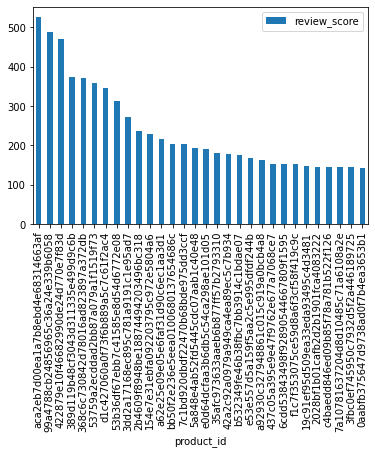

In [77]:
# the analysis shows the count of review score in descending order that shows popularity.
most_popular.head(30).plot(kind = "bar")

In [78]:
## Colaborative filtering
subdata = data.head(10000)

In [80]:
utility_matrics = subdata.pivot_table(values='review_score', index='customer_id', columns='product_id', fill_value=0)
utility_matrics.head()

product_id,0009406fd7479715e4bef61dd91f2462,00636f9286f69c9f1bdabe76e670fb50,007c63ae4b346920756b5adcad8095de,00ba6d766f0b1d7b78a5ce3e1e033263,00be617b58175bf207fd35910d5097a4,00d2fa6f2a87633084c8e0400d41a65a,00e41fb1706dc56cc3bbdd2c1d6df362,00ffe57f0110d73fd84d162252b2c784,010c38887e6a41a5acfea2687515b254,0185e6719ca5c224fc53853997fa3f68,01a5038835acf17f141c7247956b72d6,01bd9be7c04525d23a4a901b4abbf56c,0214e4741dab5812bb31a61af1dc3de5,024553ca83fc6e9ec93f5a9c823d1834,02fbee632a2044d48ab16d57eec4db58,03566b85189259c49476f004ad2afd08,0368744ea61d6163219e3bcbbbac3680,03bb06cda40712fb8473f7962fb7d198,03c1fa561b6e1d70f9fa22ab1f08c762,03c526c6224e8b74620b3b1ff4d0f3ad,03d10117bf5dbd1e4f194566be73de5a,03d5bcd7db52bee20887c5034650185d,04bbe69bca409d1d1fdd812267c89302,04fd8d64a2539d188bef33bb288410bb,0522015abfd1094949180dee8dacbdf9,05696da7eee323669666f62228d00f78,056d012d264624accb7f73d31caee034,056fc939c78534a5fb6a762ef17d912e,057041a5c3e1080ad700db092badca71,05dd4bacd8cd34a33815b90b38176a69,...,fb783e3e545937820b57fe539b2c5a6c,fb8e60e1a3c247d3a2e17f6986e71a40,fb927c44d15e24c578f85a862576fd88,fbcd9b07bda0301e7e776fc1ab26fdfe,fbf19c12a50f1467bcae50364475ca26,fc1d8637c0268af3db482c14b7ef8e75,fc2053a22dde0b067898ea436a86ec6e,fc56c478c11ca5989e21da62cb19de16,fc7d2de677b4aec44e4c6c900d3f8b79,fc9f8ce7c9be6295161b8c8fccb26b6b,fcad6e5643f855de4b616a24e6dd25e4,fcb7e7f24f5e50c7786b39f30d5ae704,fd1eb7fd67e76cf3283618735a57cbcd,fd440fd792fd8a4b681f1eb258c25445,fd55ab8af788f6bba621cd37a8701889,fd8427a5b8ddccc638a8861eed9aef64,fdb7db3bff9c924c80ae39b6cd2e82a7,fdbd77fe1773263558126c16e0b4b67c,fe281ff6eb3a52425dca9c76f4b505c0,fe8bd0b912e59890950cae5e3bf908c9,fe95eb948375116da759c8ef60295001,fec565c4e3ad965c73fb1a21bb809257,ff50a7795bf14586aeb06610fae49095,ff5ecb2f7628793844e861076ab8e467,ff922797a6771cab4e0c51d482285ec3,ff95ac47246ef13e48712ea1ff8df0d9,ff96895c6b1d31f34b2d82f86670fa85,ffae6024df16802ba75f761d9aa24367,ffb2a783fe9381154e13bb3457651996,ffd34459c21034d1da6df9800de0d7a3
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000379cdec625522490c315e70c7a9fb,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0005aefbb696d34b3424dccd0a0e9fd0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
00066ccbe787a588c52bd5ff404590e3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
000e943451fc2788ca6ac98a682f2f49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
001028b78fd413e19704b3867c369d3a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [82]:
# we are getting sparse matrics thus we need and thats why we have filled values with 0.
# we need to look at the transpose of the matrics
tr = utility_matrics.T
tr.head()

customer_id,000379cdec625522490c315e70c7a9fb,0005aefbb696d34b3424dccd0a0e9fd0,00066ccbe787a588c52bd5ff404590e3,000e943451fc2788ca6ac98a682f2f49,001028b78fd413e19704b3867c369d3a,00114026c1b7b52ab1773f317ef4880b,002408f390f729598bbac1ef9421c6ae,002450e9ea44cb90b8a07ba0b197e149,0026d252429f669d454d726e5e956aa1,0030aded3a67b29946a128ee8468388e,0035b30e58c620fa2bd30275ddd4f7ef,00474d2582fd72663036795b7ab8cfc1,0050ee32fbb93383fb0d9e3d8ee89a07,00573ea7a2ac9dff51ac3d177cd6eaea,0057f8b7c332d630b992d6a8ca79748c,006496598c918064dc19eef95e5e47f8,006a5d6b5f648f3811fd4fa94d93a67c,00701ade29704fc9aa33a8766b082cb6,007b7f04a35e02745c23ea706492ca20,007c76c2ab6101f00798548775dfdbaf,009ac0aeacb7e5c368452976385b7903,009e30667771830117017cf8581b98a5,00a7f9b60493b4b11601b42e5f31eac9,00a860aeb15fb205efdb0c689d8f9c6a,00b5072ef1192bc4d02e1d6264317bb0,00b694184c8c2f2a565e4def5a00b8ee,00ba767af52461bf567696d2a6d2909f,00c2781c163b9f057924ed8c45c724d4,00d4c7cec24152e73f88312fdbf09ffa,00d9314fb3f147133d0dae548abab307,...,ff0bdbbb629b5dc2918fb41b89dd14d8,ff1acf503bdf96c225e4dc499dac6954,ff321454b4ea8fda58a0d3a0ab2609cb,ff337d1abc22aaa5f1712f7d208bbcff,ff3fb57f76210bacea765b1f7d8876ad,ff46d91a9635a0e6f8108d75516a759c,ff4ead15d934b5b5896ca73904d07f66,ff5357994d94da35b69ee05d44805916,ff53737545b992cfdf52fcfba37e2424,ff5edbdb9bcef7fac10e564ba43b7e1d,ff761bcce41a296b30dd9f9cba4c9761,ff774d667d8f3f8fe0bdd578e8d0a85f,ff7808b1c90725d05ce0adf5d45b8c56,ff84d0fa669f79bdc394cadf5d651cf2,ff869205a42a4de9aa4a4bc357c62507,ff886777efd58cd30781969d96dfe558,ffa219109978b03ab5d6340856861021,ffa5a1a8c092d41b746947a1ad4d4b84,ffa5d7160302ea1cc18a275a81930a42,ffa9497e295ba6787d22775cd3576c77,ffb0ffdb00e2e0b31c423577db3520eb,ffc97eb567d22d3e39a56c61175f9838,ffca1cb088905d26dcee8b7d3aac4349,ffcbcec4480d074ffd50398e66bff27c,ffd940dedc35e4f459eddfa41291e824,ffdaaad4323306777060ca43b3f87e7f,ffdd80d8f3655192a9d2a38d5b18732c,ffdd933fe636d97903e7a4758faa8c6a,fff212062d600f2e1d53f3c5d4a25138,ffff42319e9b2d713724ae527742af25
product_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0009406fd7479715e4bef61dd91f2462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00636f9286f69c9f1bdabe76e670fb50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
007c63ae4b346920756b5adcad8095de,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00ba6d766f0b1d7b78a5ce3e1e033263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00be617b58175bf207fd35910d5097a4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
tr.shape

(1614, 8243)

In [86]:
# now we will decompose the matrics
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(tr)
decomposed_matrix.shape

(1614, 10)

In [87]:
# correlation matrics
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(1614, 1614)

In [89]:
# now we need to isolate product id from correlation matrics
# this is way how we are retrieving product id from index.
tr.index[143]

'18241450338cbc5751c433970f3f1060'

In [93]:
# creating list of all product names
product_names = list(tr.index)

In [94]:
# now we will see a sample of how to retrieve index from product id
t = '18241450338cbc5751c433970f3f1060'
product_id = product_names.index(t)
product_id

143

In [95]:
correlation_product_id = correlation_matrix[product_id]
correlation_product_id.shape

(1614,)

In [117]:
recommended = set(tr.index[correlation_product_id > 0.90])

In [118]:
# Removing all the items already bought by the customers
recommended.remove(t)

In [122]:
r = list(recommended)[0:10]

In [124]:
# this recommends all the products to the customer
for s in r:
    print(data[data['product_id']==s]['product_category_name'].unique()[0])

cama_mesa_banho
bebes
brinquedos
beleza_saude
cama_mesa_banho
cama_mesa_banho
moveis_decoracao
cama_mesa_banho
moveis_decoracao
cama_mesa_banho
